# Max3Sat

In [47]:
import os
import json
import pandas as pd

# Directory containing the JSON files
data_folder = "__data"

# Initialize lists to store data
data_max3sat = []
data_max3sat_noiseless = []

# Function to extract parts from filename
def extract_parts(filename):
    parts = filename.split('_')
    if len(parts) >= 8:
        method = parts[3]
        ratio = parts[6]
        rinst = parts[8].split('.')[0]
        return method, ratio, rinst
    else:
        return None, None, None

# Traverse the directory and read each JSON file
for filename in os.listdir(data_folder):
    if 'max3sat' in filename and filename.endswith(".json"):
        print(f"Processing file: {filename}")
        file_path = os.path.join(data_folder, filename)
        with open(file_path, 'r') as file:
            try:
                json_data = json.load(file)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")
                continue
            
            method, ratio, rinst = extract_parts(filename)
            print(f"Extracted parts - Method: {method}, Ratio: {ratio}, Rinst: {rinst}")
            if not method or not ratio or not rinst:
                print(f"Filename format incorrect: {filename}")
                continue

            # Use the correct key for max3sat data
            try:
                metrics = json_data["Benchmark Results - Hamiltonian Simulation - Qiskit"]["group_metrics"]
                avg_fidelities = metrics["avg_fidelities"]
                avg_depths = metrics["avg_depths"]
                groups = metrics["groups"]

                # Print lengths of extracted lists for further debugging
                print(f"Length of avg_fidelities: {len(avg_fidelities)}")
                print(f"Length of avg_depths: {len(avg_depths)}")
                print(f"Length of groups: {len(groups)}")

                # Store the data in the appropriate list
                for group, fidelity, depth in zip(groups, avg_fidelities, avg_depths):
                    data_entry = {
                        "method": method,
                        "ratio": ratio,
                        "rinst": rinst,
                        "group": group,
                        "avg_fidelity": fidelity,
                        "avg_depth": depth
                    }
                    if 'noiseless' in filename:
                        data_max3sat_noiseless.append(data_entry)
                    else:
                        data_max3sat.append(data_entry)
            except KeyError as e:
                print(f"Missing expected key in JSON data from file {filename}: {e}")
                continue

# Convert the lists to DataFrames
df_max3sat = pd.DataFrame(data_max3sat)
df_max3sat_noiseless = pd.DataFrame(data_max3sat_noiseless)

# Save the DataFrames to CSV files for easier plotting
df_max3sat.to_csv('__data/collected_data_max3sat.csv', index=False)
df_max3sat_noiseless.to_csv('__data/collected_data_max3sat_noiseless.csv', index=False)

# Display the DataFrames
print("Max 3-SAT DataFrame")
print(df_max3sat)
print("\nMax 3-SAT Noiseless DataFrame")
print(df_max3sat_noiseless)


Processing file: DATA-qasm_simulator_method_1_max3sat_ratio_2_rinst_04.json
Extracted parts - Method: 1, Ratio: 2, Rinst: 04
Length of avg_fidelities: 7
Length of avg_depths: 7
Length of groups: 7
Processing file: DATA-qasm_simulator_method_3_max3sat_ratio_4_rinst_03.json
Extracted parts - Method: 3, Ratio: 4, Rinst: 03
Length of avg_fidelities: 7
Length of avg_depths: 7
Length of groups: 7
Processing file: DATA-qasm_simulator_method_3_max3sat_ratio_3_rinst_02.json
Extracted parts - Method: 3, Ratio: 3, Rinst: 02
Length of avg_fidelities: 7
Length of avg_depths: 7
Length of groups: 7
Processing file: DATA-qasm_simulator_method_1_max3sat_ratio_5_rinst_05.json
Extracted parts - Method: 1, Ratio: 5, Rinst: 05
Length of avg_fidelities: 7
Length of avg_depths: 7
Length of groups: 7
Processing file: DATA-qasm_simulator_method_2_max3sat_ratio_3_rinst_04.json
Extracted parts - Method: 2, Ratio: 3, Rinst: 04
Length of avg_fidelities: 7
Length of avg_depths: 7
Length of groups: 7
Processing file

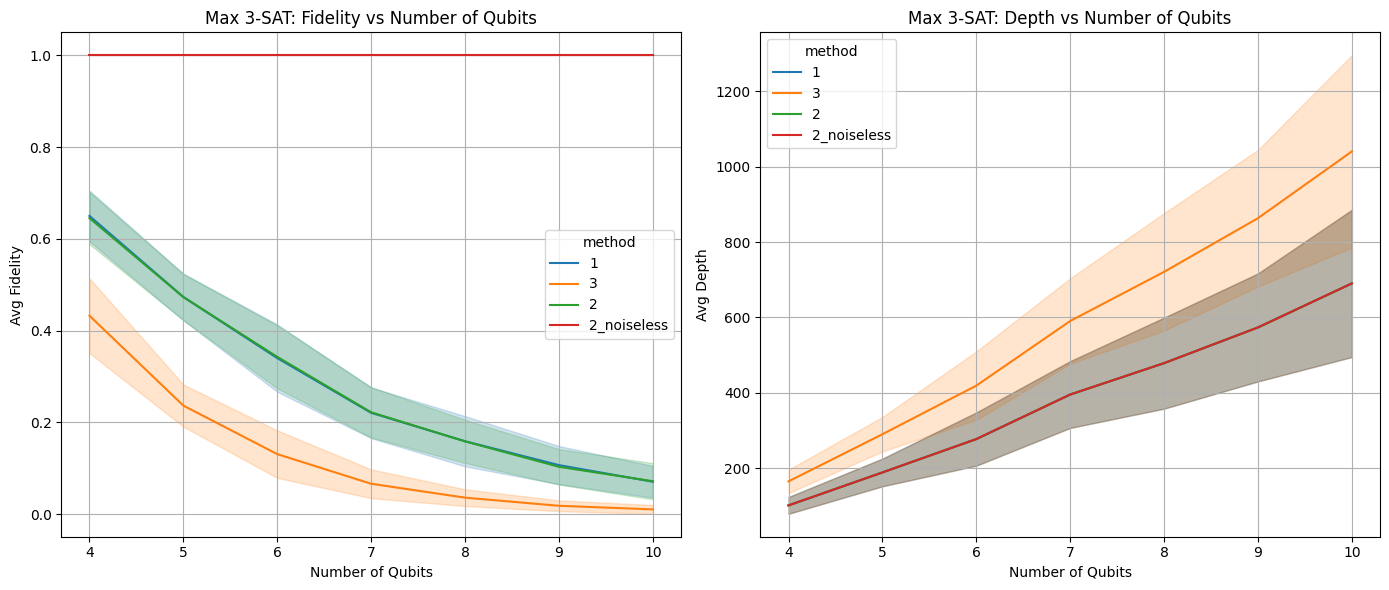

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_max3sat = pd.read_csv('__data/collected_data_max3sat.csv')
df_max3sat_noiseless = pd.read_csv('__data/collected_data_max3sat_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_max3sat_noiseless['method'] = '2_noiseless'
df_max3sat['method'] = df_max3sat['method'].astype(str)
df_combined = pd.concat([df_max3sat, df_max3sat_noiseless])

# Ensure 'group', 'ratio', and 'method' are treated as integers
df_combined['group'] = df_combined['group'].astype(int)
df_combined['ratio'] = df_combined['ratio'].astype(int)
df_combined['method'] = df_combined['method'].astype(str)

# Plot fidelity vs number of qubits
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_combined, x='group', y='avg_fidelity', hue='method', estimator='mean', errorbar='sd')
plt.title('Max 3-SAT: Fidelity vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Avg Fidelity')
plt.grid(True)

# Plot depth vs number of qubits
plt.subplot(1, 2, 2)
sns.lineplot(data=df_combined, x='group', y='avg_depth', hue='method', estimator='mean', errorbar='sd')
plt.title('Max 3-SAT: Depth vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Avg Depth')
plt.grid(True)

plt.tight_layout()
plt.show()


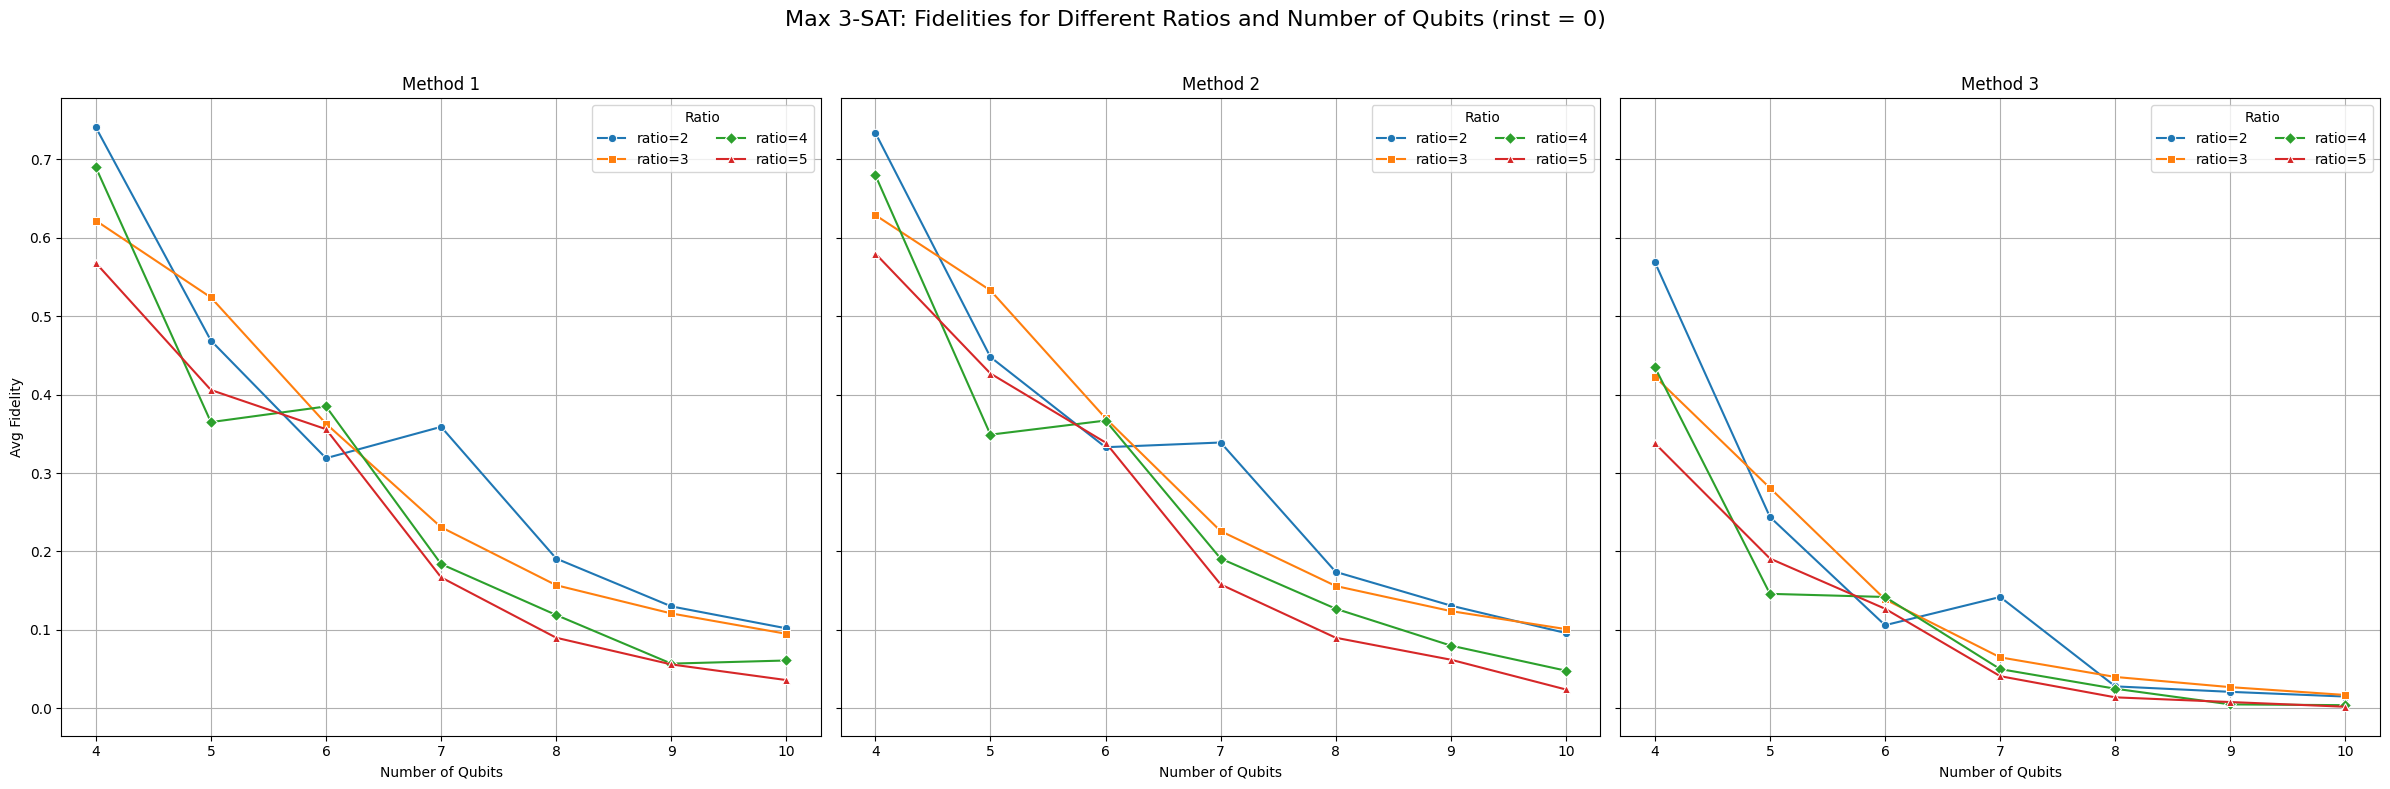

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_max3sat = pd.read_csv('__data/collected_data_max3sat.csv')

# Ensure 'group', 'ratio', and 'rinst' are treated as integers
df_max3sat['group'] = df_max3sat['group'].astype(int)
df_max3sat['ratio'] = df_max3sat['ratio'].astype(int)
df_max3sat['rinst'] = df_max3sat['rinst'].astype(int)

# Filter the data for rinst = 0
df_max3sat = df_max3sat[df_max3sat['rinst'] == 0]

# Unique methods and ratios
methods = sorted(df_max3sat['method'].unique())
unique_ratios = sorted(df_max3sat['ratio'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharey=True)
fig.suptitle('Max 3-SAT: Fidelities for Different Ratios and Number of Qubits (rinst = 0)', fontsize=16)

# Define markers for distinct shapes
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H']

# Plot data
for j, method in enumerate(methods):
    ax = axs[j]
    subset = df_max3sat[df_max3sat['method'] == method]

    for k, ratio in enumerate(unique_ratios):
        ratio_subset = subset[subset['ratio'] == ratio]
        
        sns.lineplot(
            data=ratio_subset, x='group', y='avg_fidelity', 
            marker=markers[k % len(markers)], ax=ax, label=f'ratio={ratio}'
        )
    
    ax.set_title(f'Method {method}')
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Avg Fidelity')
    ax.legend(title='Ratio', ncol=2)
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


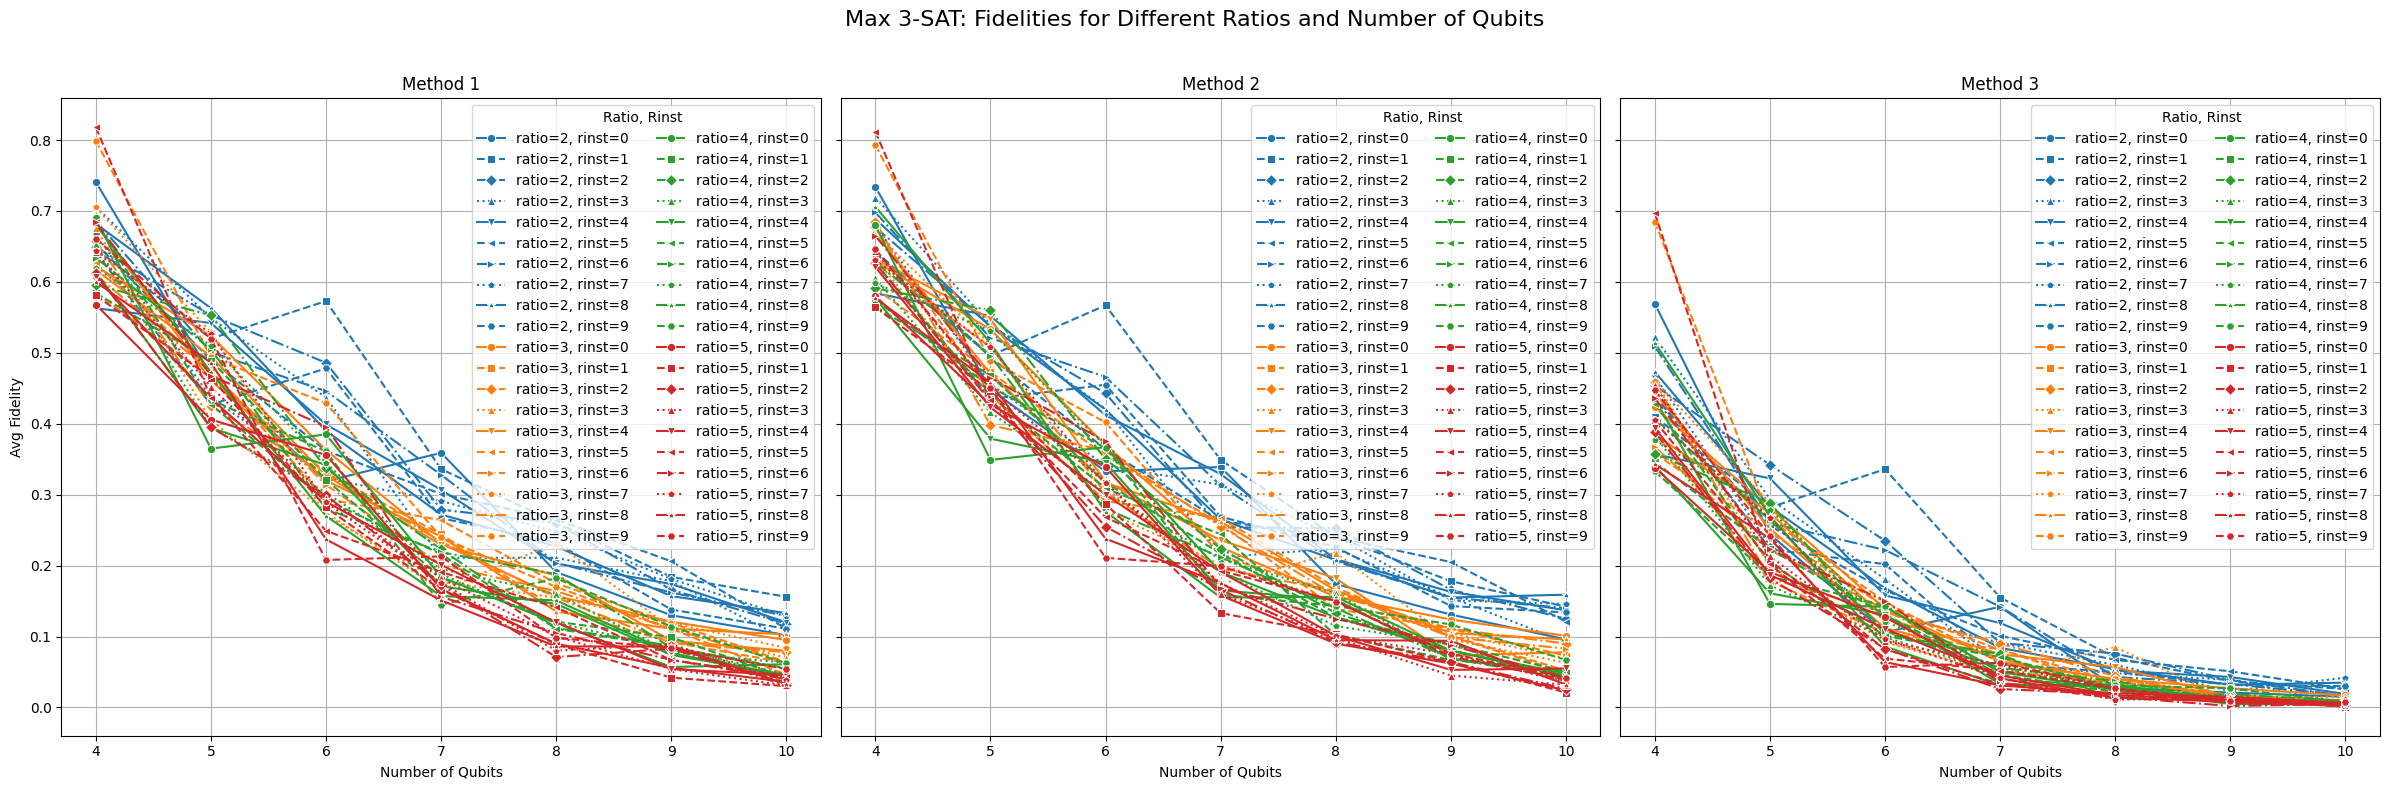

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_max3sat = pd.read_csv('__data/collected_data_max3sat.csv')

# Ensure 'group', 'ratio', and 'rinst' are treated as integers
df_max3sat['group'] = df_max3sat['group'].astype(int)
df_max3sat['ratio'] = df_max3sat['ratio'].astype(int)
df_max3sat['rinst'] = df_max3sat['rinst'].astype(int)

# Unique methods, ratios, and rinsts
methods = sorted(df_max3sat['method'].unique())
unique_ratios = sorted(df_max3sat['ratio'].unique())
unique_rinsts = sorted(df_max3sat['rinst'].unique())

# Define markers and line styles for distinct shapes and styles
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H']
line_styles = ['-', '--', '-.', ':']

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharey=True)
fig.suptitle('Max 3-SAT: Fidelities for Different Ratios and Number of Qubits', fontsize=16)

# Plot data
for j, method in enumerate(methods):
    ax = axs[j]
    subset = df_max3sat[df_max3sat['method'] == method]

    for ratio in unique_ratios:
        ratio_subset = subset[subset['ratio'] == ratio]
        color = sns.color_palette("tab10", len(unique_ratios))[unique_ratios.index(ratio)]
        
        for k, rinst in enumerate(unique_rinsts):
            rinst_subset = ratio_subset[ratio_subset['rinst'] == rinst]
            linestyle = line_styles[k % len(line_styles)]
            marker = markers[k % len(markers)]
            
            sns.lineplot(
                data=rinst_subset, x='group', y='avg_fidelity', 
                marker=marker, linestyle=linestyle, color=color, 
                ax=ax, label=f'ratio={ratio}, rinst={rinst}'
            )
    
    ax.set_title(f'Method {method}')
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Avg Fidelity')
    ax.legend(title='Ratio, Rinst', ncol=2)
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


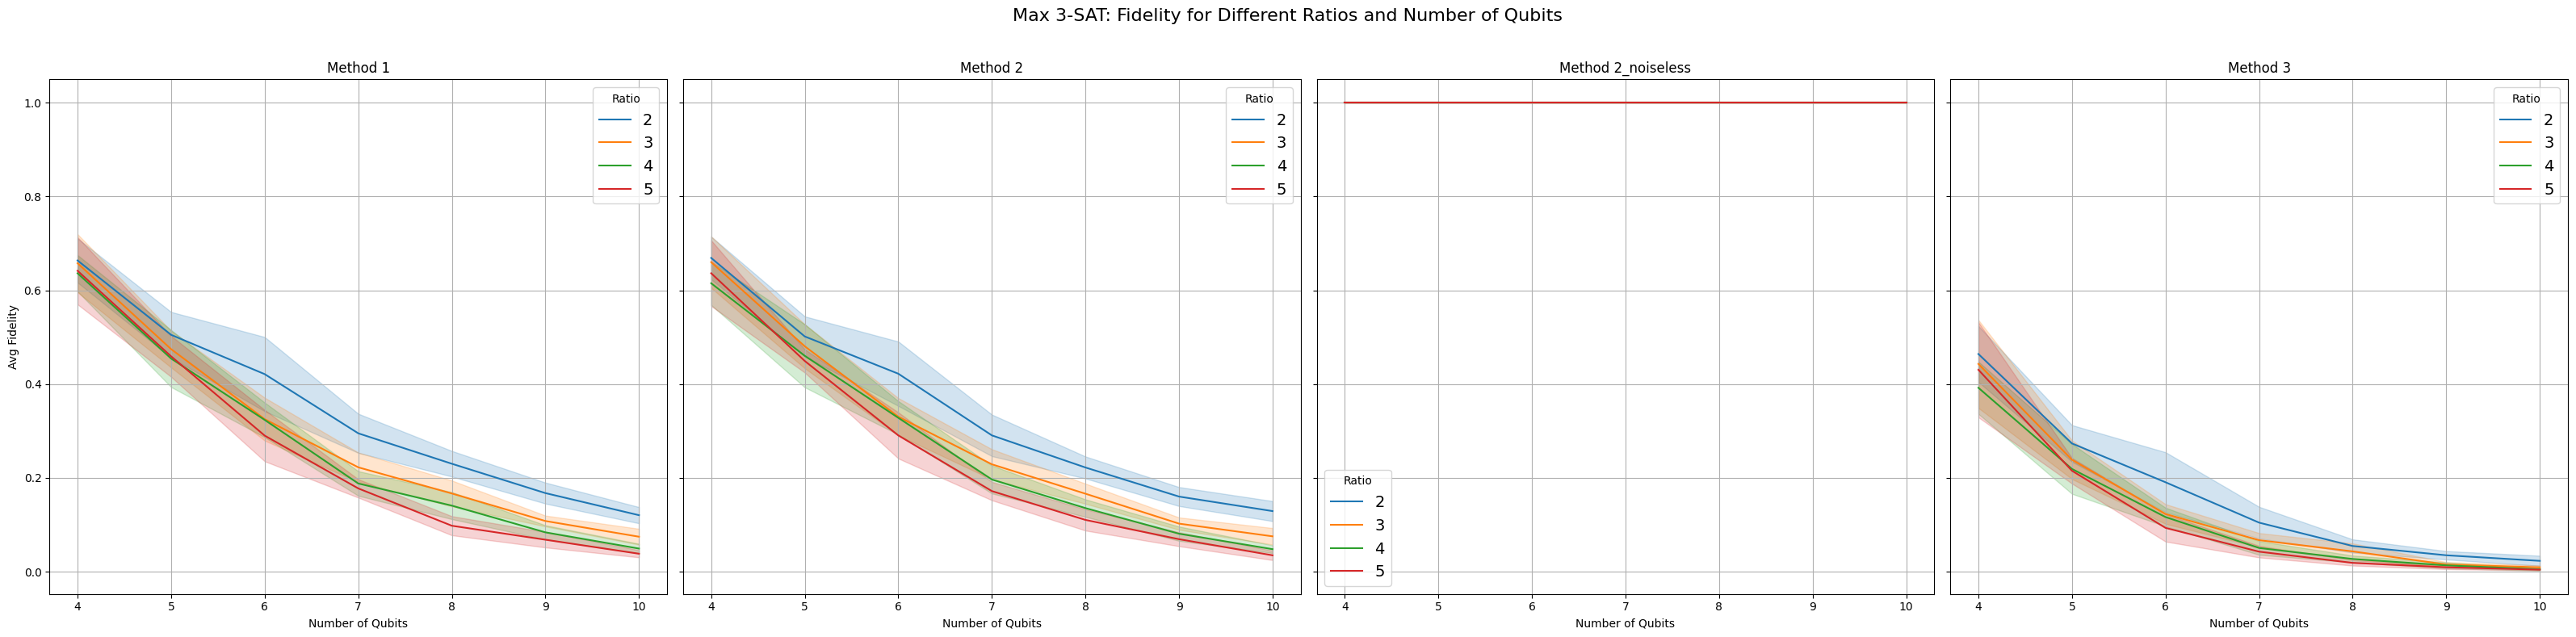

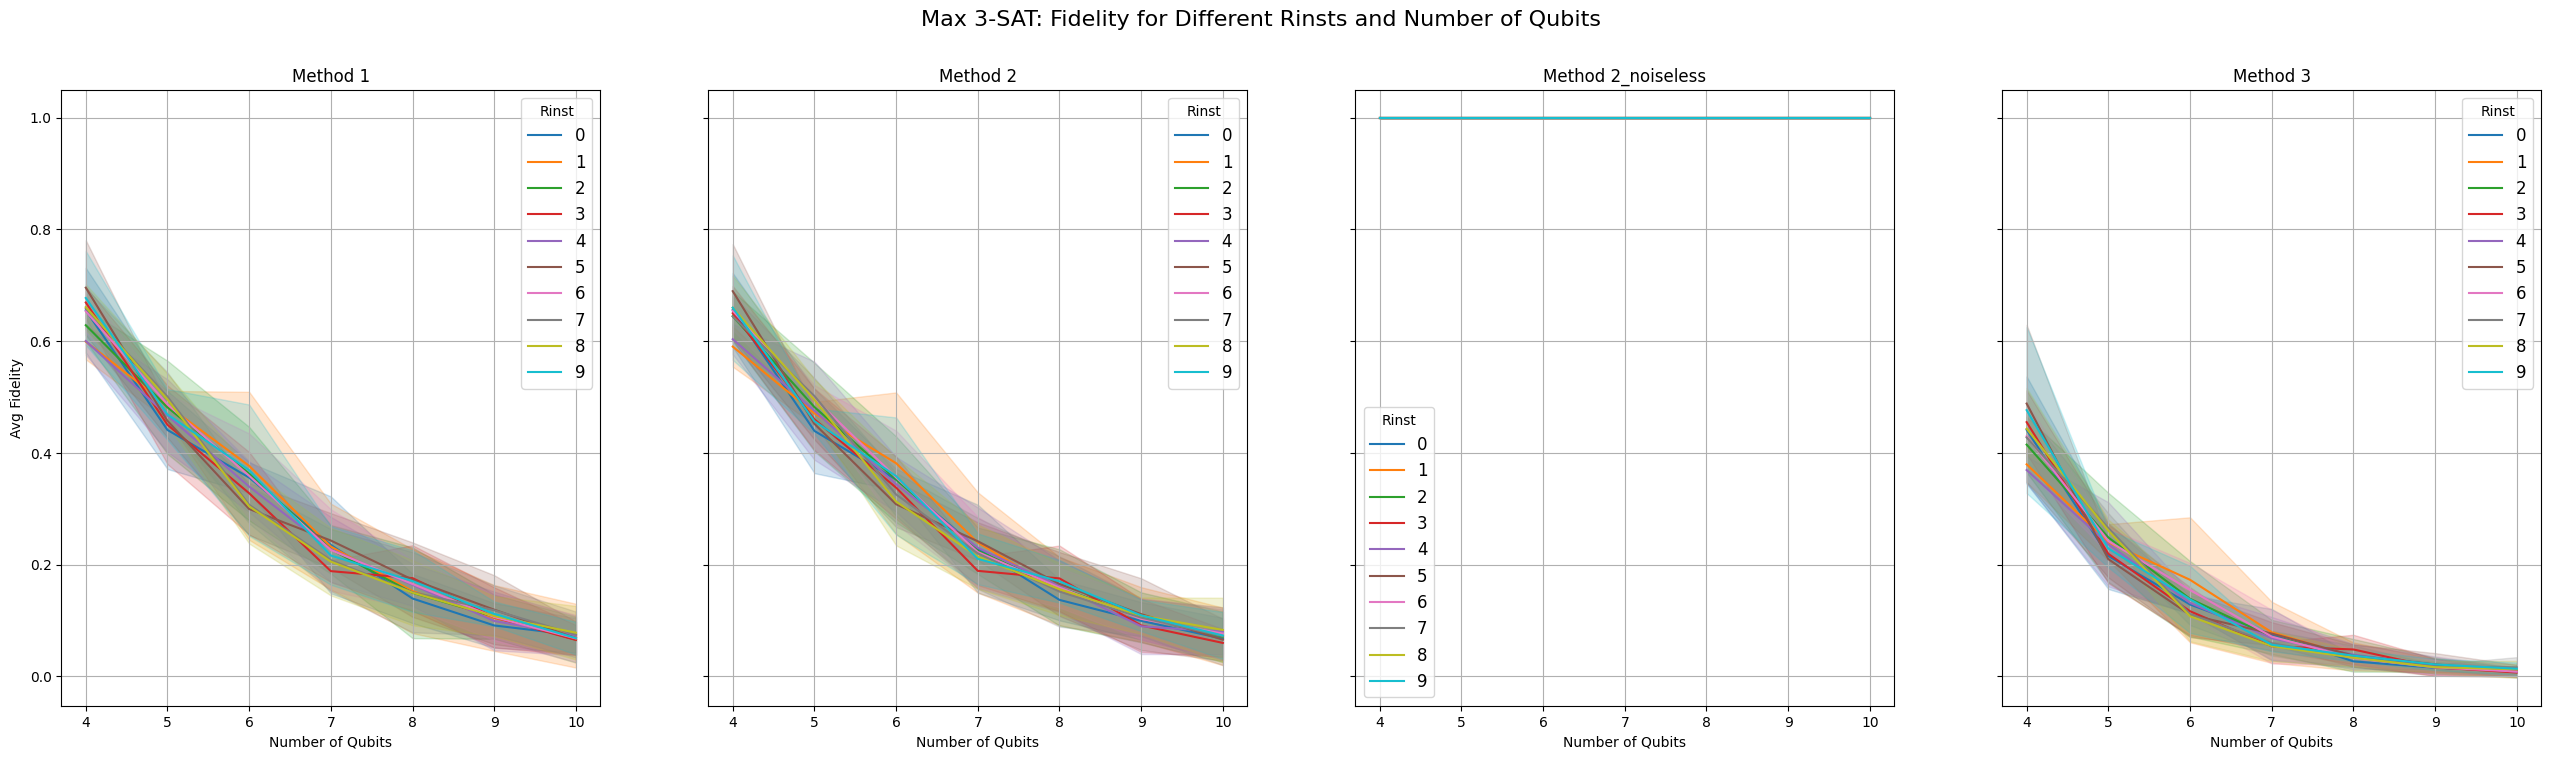

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_max3sat = pd.read_csv('__data/collected_data_max3sat.csv')
df_max3sat_noiseless = pd.read_csv('__data/collected_data_max3sat_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_max3sat_noiseless['method'] = '2_noiseless'
df_max3sat['method'] = df_max3sat['method'].astype(str)
df_combined = pd.concat([df_max3sat, df_max3sat_noiseless])

# Ensure 'group', 'ratio', and 'rinst' are treated as integers
df_combined['group'] = df_combined['group'].astype(int)
df_combined['ratio'] = df_combined['ratio'].astype(int)
df_combined['rinst'] = df_combined['rinst'].astype(int)

# Unique methods, ratios, and rinst values
methods = sorted(df_combined['method'].unique())
unique_ratios = sorted(df_combined['ratio'].unique())
unique_rinsts = sorted(df_combined['rinst'].unique())

# Set up the figure for Ratios
fig1, axs1 = plt.subplots(1, 4, figsize=(32, 8), sharey=True)
fig1.suptitle('Max 3-SAT: Fidelity for Different Ratios and Number of Qubits', fontsize=16)

# Plot data for Ratios
for j, method in enumerate(methods):
    ax = axs1[j]
    subset = df_combined[df_combined['method'] == method]

    sns.lineplot(
        data=subset, x='group', y='avg_fidelity', hue='ratio',
        estimator='mean', errorbar='sd', ax=ax, palette='tab10'
    )
    
    ax.set_title(f'Method {method}')
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Avg Fidelity')
    ax.grid(True)
    ax.legend(title='Ratio', ncol=1, fontsize=14)

# Set up the figure for Rinsts
fig2, axs2 = plt.subplots(1, 4, figsize=(32, 8), sharey=True)
fig2.suptitle('Max 3-SAT: Fidelity for Different Rinsts and Number of Qubits', fontsize=16)

# Plot data for Rinsts
for j, method in enumerate(methods):
    ax = axs2[j]
    subset = df_combined[df_combined['method'] == method]

    sns.lineplot(
        data=subset, x='group', y='avg_fidelity', hue='rinst',
        estimator='mean', errorbar='sd', ax=ax, palette='tab10'
    )
    
    ax.set_title(f'Method {method}')
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Avg Fidelity')
    ax.grid(True)
    ax.legend(title='Rinst', ncol=1, fontsize=12)

# Adjust layout for the first figure
fig1.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()

# Adjust layout for the second figure
fig2.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


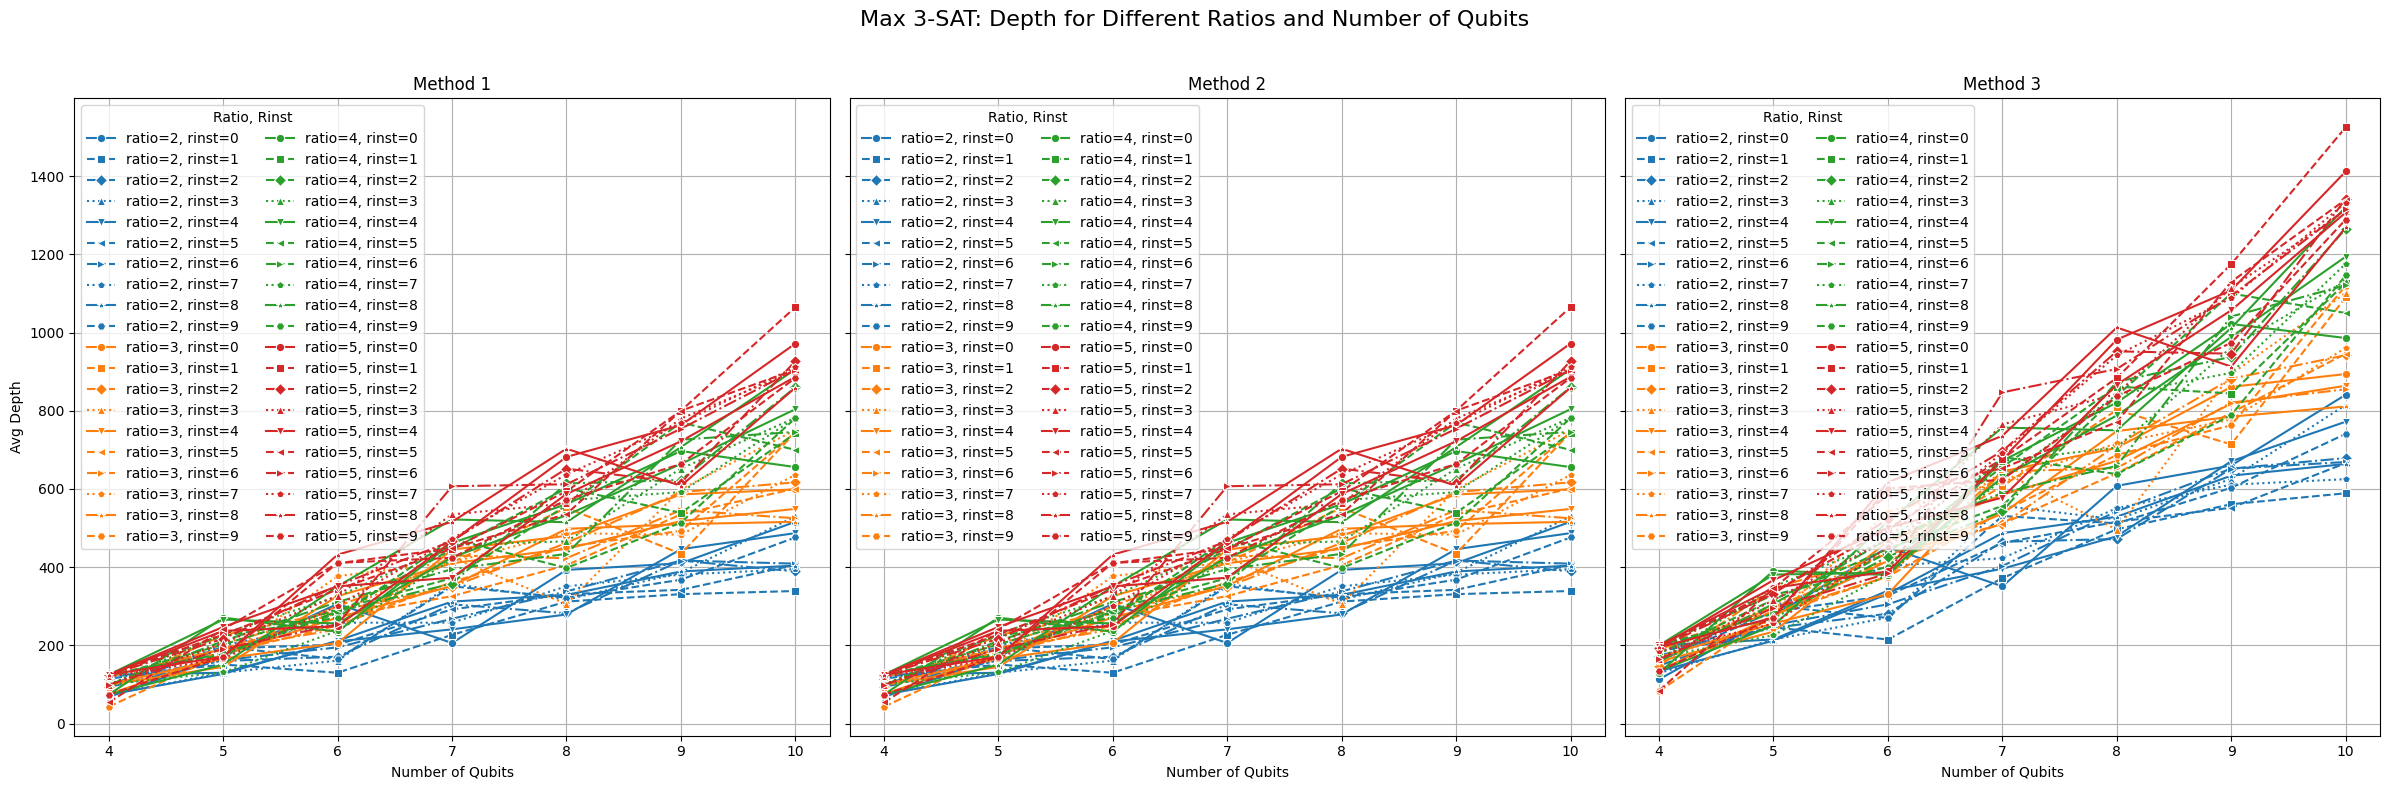

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_max3sat = pd.read_csv('__data/collected_data_max3sat.csv')

# Ensure 'group', 'ratio', and 'rinst' are treated as integers
df_max3sat['group'] = df_max3sat['group'].astype(int)
df_max3sat['ratio'] = df_max3sat['ratio'].astype(int)
df_max3sat['rinst'] = df_max3sat['rinst'].astype(int)

# Unique methods, ratios, and rinsts
methods = sorted(df_max3sat['method'].unique())
unique_ratios = sorted(df_max3sat['ratio'].unique())
unique_rinsts = sorted(df_max3sat['rinst'].unique())

# Define markers and line styles for distinct shapes and styles
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H']
line_styles = ['-', '--', '-.', ':']

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharey=True)
fig.suptitle('Max 3-SAT: Depth for Different Ratios and Number of Qubits', fontsize=16)

# Plot data
for j, method in enumerate(methods):
    ax = axs[j]
    subset = df_max3sat[df_max3sat['method'] == method]

    for ratio in unique_ratios:
        ratio_subset = subset[subset['ratio'] == ratio]
        color = sns.color_palette("tab10", len(unique_ratios))[unique_ratios.index(ratio)]
        
        for k, rinst in enumerate(unique_rinsts):
            rinst_subset = ratio_subset[ratio_subset['rinst'] == rinst]
            linestyle = line_styles[k % len(line_styles)]
            marker = markers[k % len(markers)]
            
            sns.lineplot(
                data=rinst_subset, x='group', y='avg_depth', 
                marker=marker, linestyle=linestyle, color=color, 
                ax=ax, label=f'ratio={ratio}, rinst={rinst}'
            )
    
    ax.set_title(f'Method {method}')
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Avg Depth')
    ax.legend(title='Ratio, Rinst', ncol=2)
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


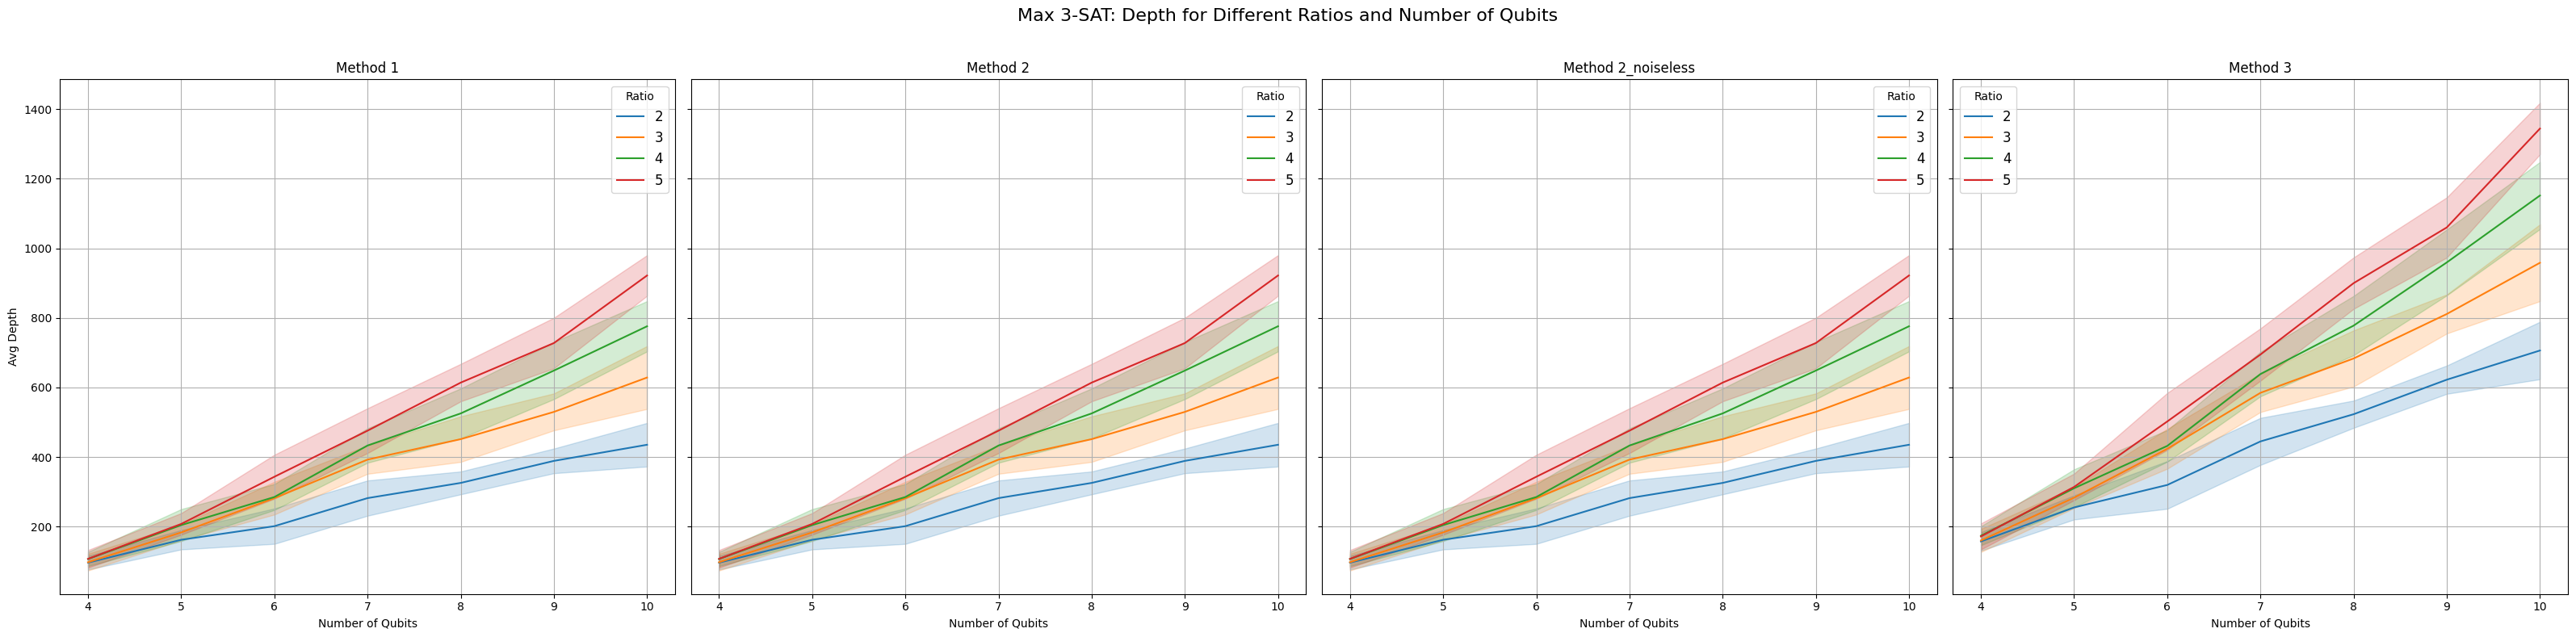

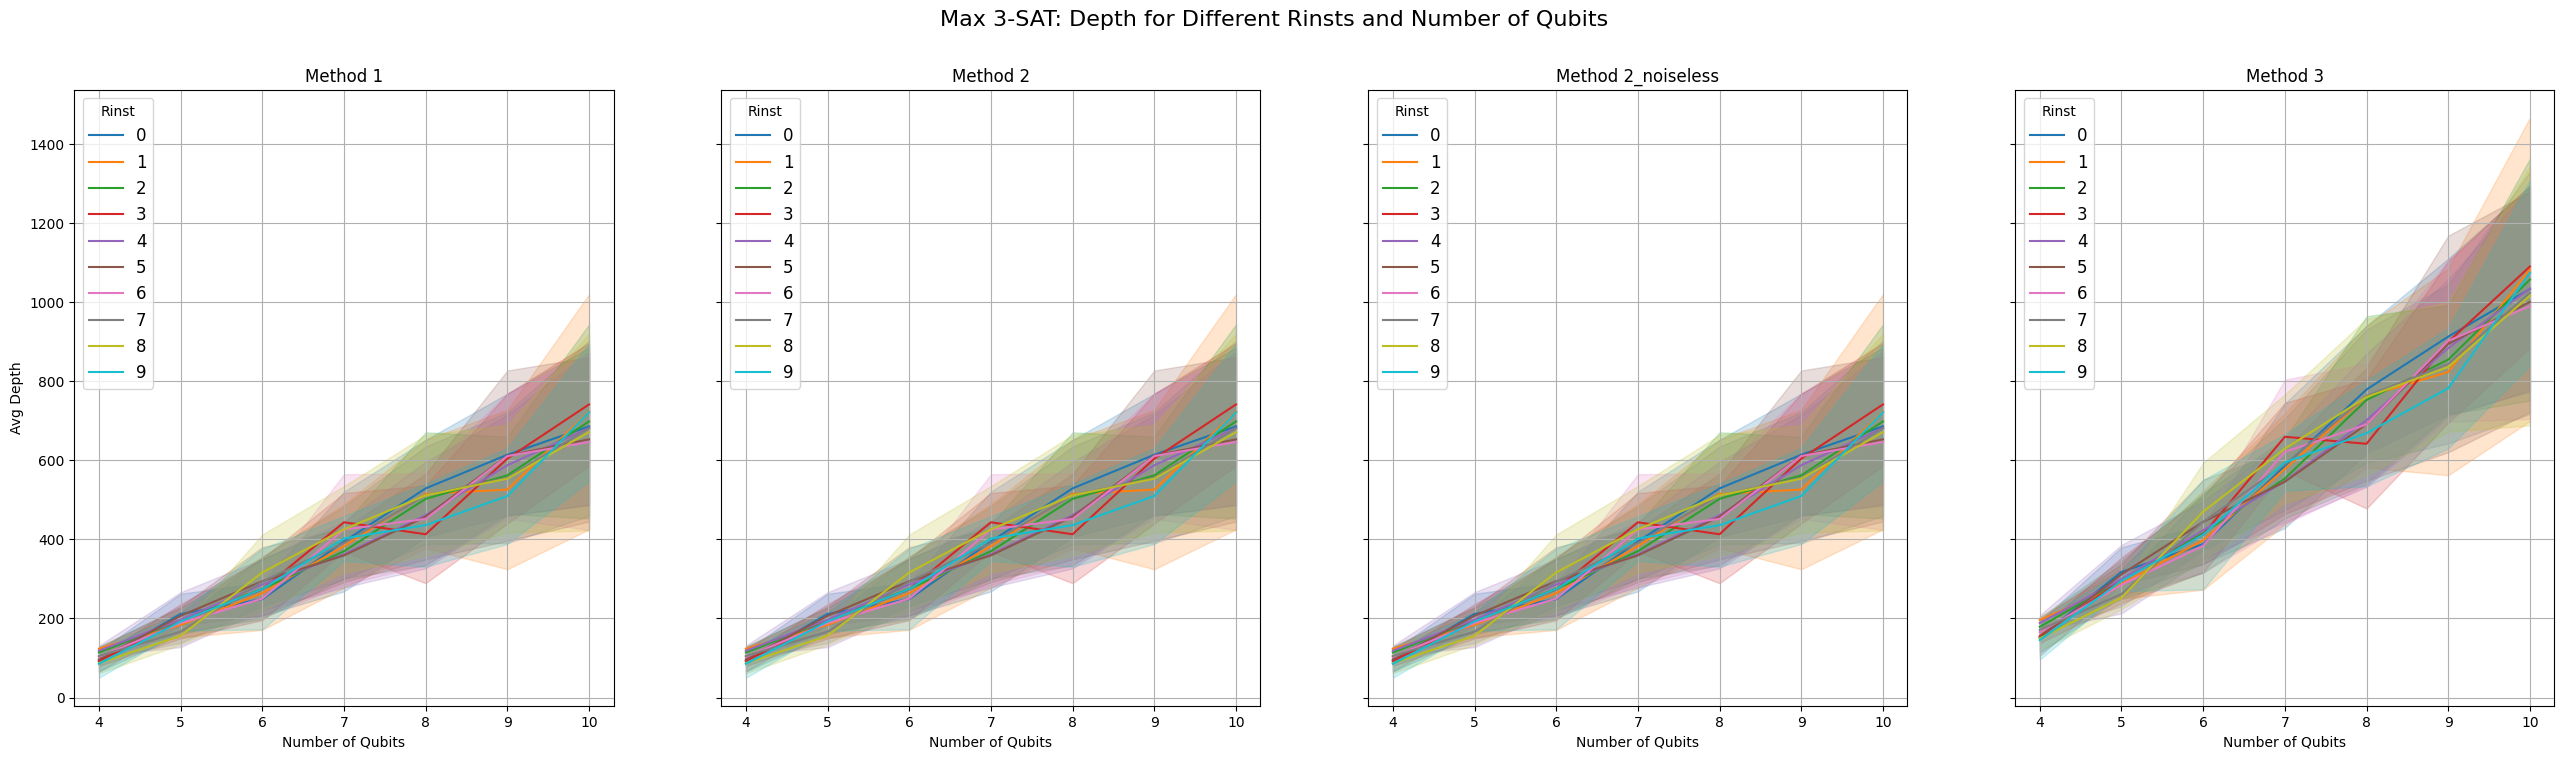

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_max3sat = pd.read_csv('__data/collected_data_max3sat.csv')
df_max3sat_noiseless = pd.read_csv('__data/collected_data_max3sat_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_max3sat_noiseless['method'] = '2_noiseless'
df_max3sat['method'] = df_max3sat['method'].astype(str)
df_combined = pd.concat([df_max3sat, df_max3sat_noiseless])

# Ensure 'group', 'ratio', and 'rinst' are treated as integers
df_combined['group'] = df_combined['group'].astype(int)
df_combined['ratio'] = df_combined['ratio'].astype(int)
df_combined['rinst'] = df_combined['rinst'].astype(int)

# Unique methods, ratios, and rinst values
methods = sorted(df_combined['method'].unique())
unique_ratios = sorted(df_combined['ratio'].unique())
unique_rinsts = sorted(df_combined['rinst'].unique())

# Set up the figure for Ratios
fig1, axs1 = plt.subplots(1, 4, figsize=(32, 8), sharey=True)
fig1.suptitle('Max 3-SAT: Depth for Different Ratios and Number of Qubits', fontsize=16)

# Plot data for Ratios
for j, method in enumerate(methods):
    ax = axs1[j]
    subset = df_combined[df_combined['method'] == method]

    sns.lineplot(
        data=subset, x='group', y='avg_depth', hue='ratio',
        estimator='mean', errorbar='sd', ax=ax, palette='tab10'
    )
    
    ax.set_title(f'Method {method}')
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Avg Depth')
    ax.grid(True)
    ax.legend(title='Ratio', ncol=1, fontsize=12)

# Set up the figure for Rinsts
fig2, axs2 = plt.subplots(1, 4, figsize=(32, 8), sharey=True)
fig2.suptitle('Max 3-SAT: Depth for Different Rinsts and Number of Qubits', fontsize=16)

# Plot data for Rinsts
for j, method in enumerate(methods):
    ax = axs2[j]
    subset = df_combined[df_combined['method'] == method]

    sns.lineplot(
        data=subset, x='group', y='avg_depth', hue='rinst',
        estimator='mean', errorbar='sd', ax=ax, palette='tab10'
    )
    
    ax.set_title(f'Method {method}')
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Avg Depth')
    ax.grid(True)
    ax.legend(title='Rinst', ncol=1, fontsize=12)

# Adjust layout for the first figure
fig1.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()

# Adjust layout for the second figure
fig2.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


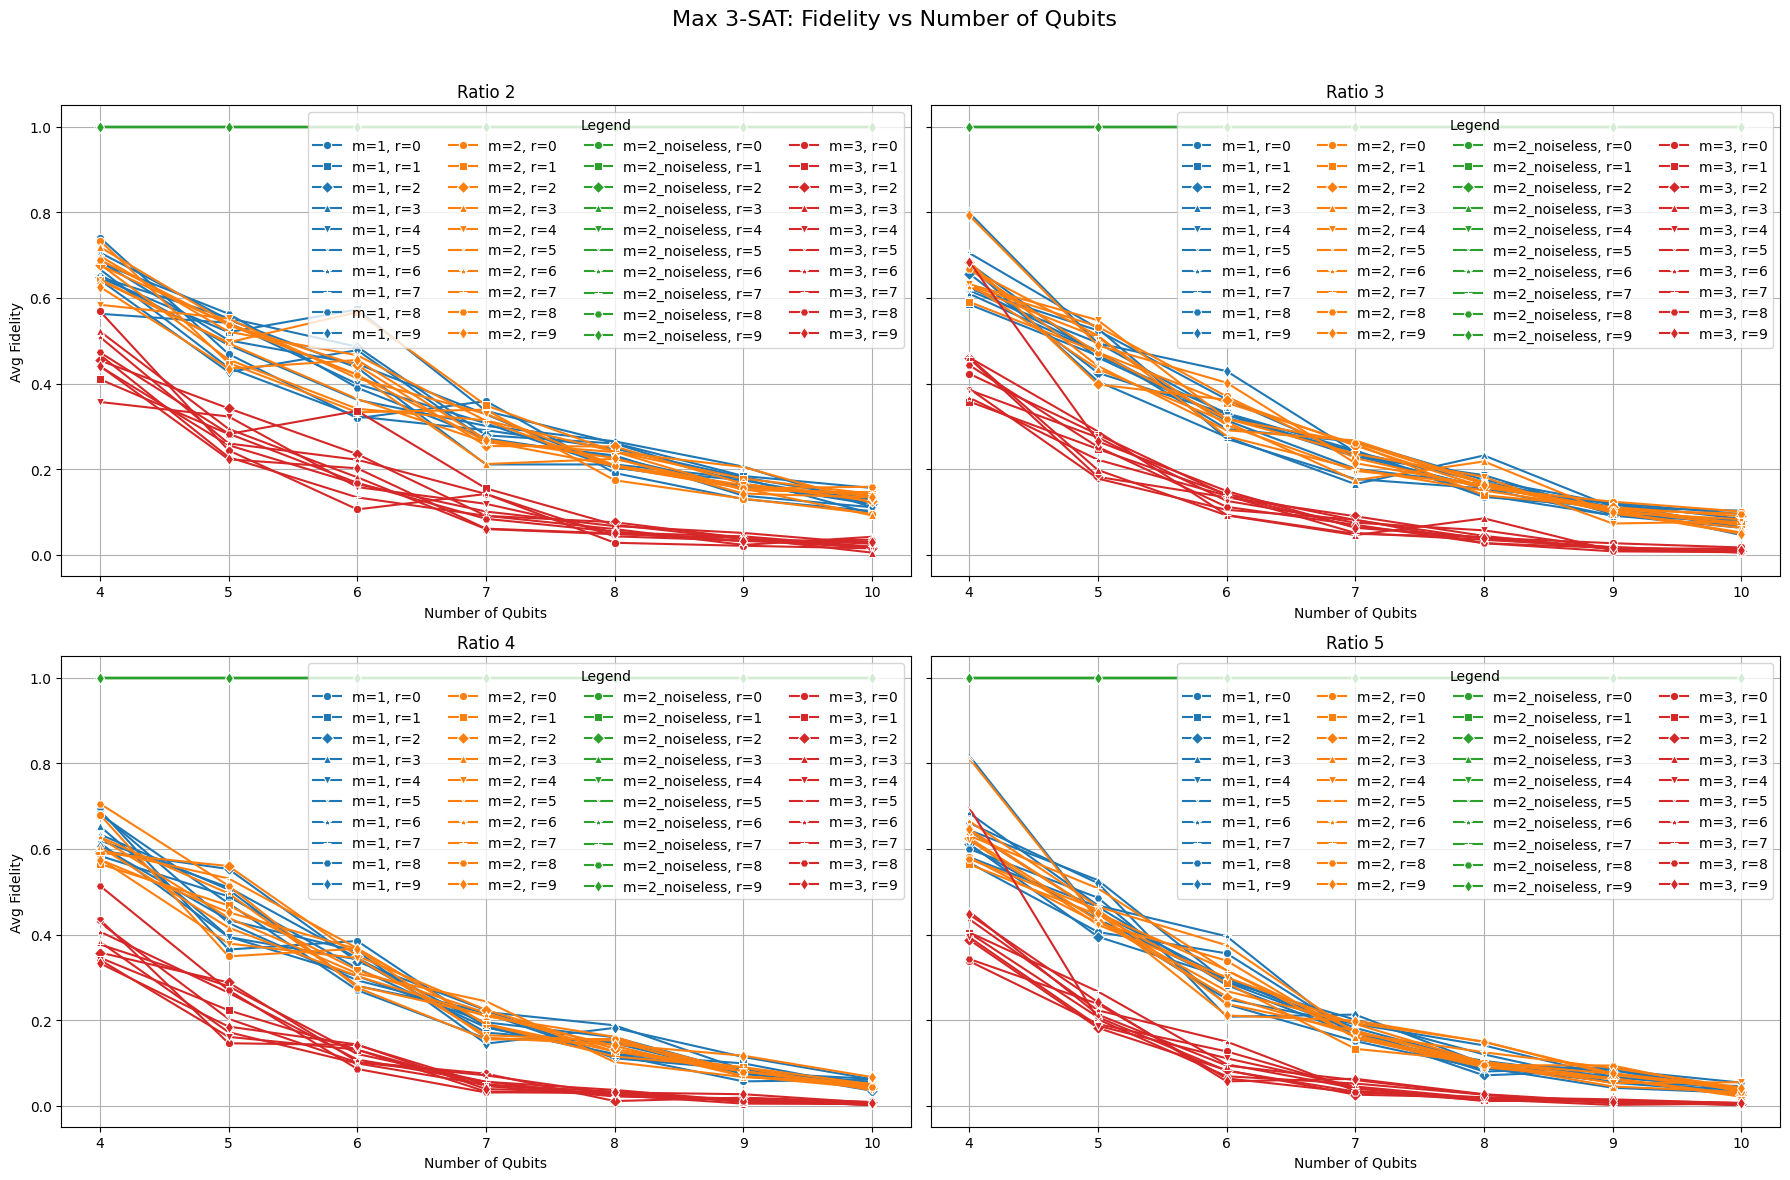

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_max3sat = pd.read_csv('__data/collected_data_max3sat.csv')
df_max3sat_noiseless = pd.read_csv('__data/collected_data_max3sat_noiseless.csv')

# Ensure 'group', 'method', 'ratio', and 'rinst' are treated as integers
df_max3sat['group'] = df_max3sat['group'].astype(int)
df_max3sat['method'] = df_max3sat['method'].astype(int)
df_max3sat['ratio'] = df_max3sat['ratio'].astype(int)
df_max3sat['rinst'] = df_max3sat['rinst'].astype(int)
df_max3sat_noiseless['group'] = df_max3sat_noiseless['group'].astype(int)
df_max3sat_noiseless['method'] = df_max3sat_noiseless['method'].astype(int)
df_max3sat_noiseless['ratio'] = df_max3sat_noiseless['ratio'].astype(int)
df_max3sat_noiseless['rinst'] = df_max3sat_noiseless['rinst'].astype(int)

# Combine noisy and noiseless data for method 2
df_max3sat_noiseless['method'] = '2_noiseless'
df_max3sat['method'] = df_max3sat['method'].astype(str)
df_combined = pd.concat([df_max3sat, df_max3sat_noiseless])

# Define markers and colors
methods = ['1', '2', '2_noiseless', '3']
colors = sns.color_palette("tab10", len(methods))
markers = ['o', 's', 'D', '^', 'v', 'x', '*', '+', 'H', 'd']
rinst_values = sorted(df_combined['rinst'].unique())

# Define a function to plot fidelity vs number of qubits for all 4 ratios in one figure
def plot_fidelity_vs_qubits(df, ratios, title):
    fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharey=True)
    fig.suptitle(title, fontsize=16)

    for ax, ratio in zip(axs.flat, ratios):
        for method in methods:
            subset = df[(df['ratio'] == ratio) & (df['method'] == method)]
            for rinst in rinst_values:
                data = subset[subset['rinst'] == rinst]
                label = f"m={method}, r={rinst}"
                sns.lineplot(data=data, x='group', y='avg_fidelity', marker=markers[rinst % len(markers)],
                             color=colors[methods.index(method)], ax=ax, label=label, errorbar=None)

        ax.set_title(f"Ratio {ratio}")
        ax.set_xlabel('Number of Qubits')
        ax.set_ylabel('Avg Fidelity')
        ax.legend(title='Legend', ncol=4, loc = 'upper right')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Unique ratios
ratios = sorted(df_combined['ratio'].unique())

# Plot for the first 4 ratios in a 2x2 subplot layout
plot_fidelity_vs_qubits(df_combined, ratios[:4], 'Max 3-SAT: Fidelity vs Number of Qubits')

